# How are in-demand skills trending for Data Analysts?

### Methodology

1. Aggregate skill counts monthly
2. Analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [2]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
df = pd.read_csv('data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_IT = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Italy')].copy() 

In [6]:
df_DA_IT['job_posted_month'] = df_DA_IT['job_posted_date'].dt.month

In [7]:
df_DA_IT_explode = df_DA_IT.explode('job_skills')

In [10]:
df_DA_IT_pivot = df_DA_IT_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

In [12]:
df_DA_IT_pivot.loc['Total'] = df_DA_IT_pivot.sum()

In [16]:
df_DA_IT_pivot = df_DA_IT_pivot[df_DA_IT_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_IT_pivot = df_DA_IT_pivot.drop('Total')

In [21]:
DA_totals = df_DA_IT.groupby('job_posted_month').size()

In [23]:
df_DA_IT_percent = df_DA_IT_pivot.div(DA_totals/100, axis=0)

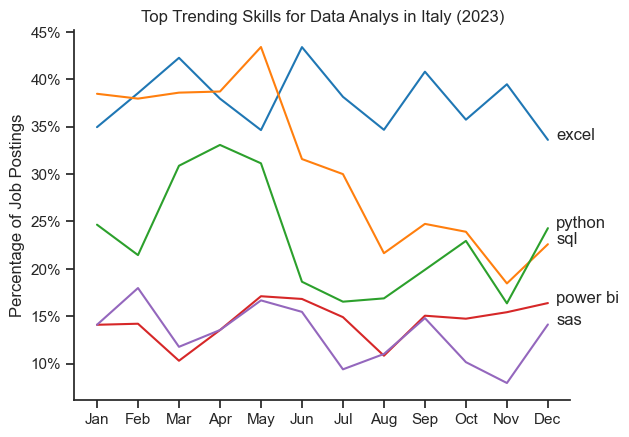

In [33]:
df_plot = df_DA_IT_percent.iloc[:, :5]

sns.set_theme(style="ticks")

sns.lineplot(data=df_plot, dashes=False, palette="tab10", legend=False)
sns.despine()

plt.title('Top Trending Skills for Data Analys in Italy (2023)')
plt.xlabel('')
plt.ylabel('Percentage of Job Postings')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))

for i in range(5):
    plt.text(12.2 , df_plot.iloc[-1, i], df_plot.columns[i],)
plt.show()
